<h1> Simple MNIST NN from scratch </h1>
<p>In this notebook, I implemented a simple two-layer neural network and trained it on the MNIST digit recognizer dataset. It's meant to be an instructional example, through which you can understand the underlying math of neural networks better.</p>



<h1> 0. Installing The Requirements</h1>

In [ ]:
# Getting Ready: Installing only once.
# !pip install -r requirements.txt

In [ ]:
# Installing just once the dataset.
# NOTE: it is taken from competition, so needed to download & extract!
# !kaggle competitions download -c digit-recognizer


<h1> 1. LOAD DATA</h1>

In [1]:
from dotenv import load_dotenv
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

print("Loading environment variables from .env file...")
load_dotenv()

# Get the file path from the .env file
# 'train.csv' is a default fallback value
file_path = os.getenv('LOCAL_TRAIN_FILE_PATH', 'train.csv')

print(f"Loading data from path: {file_path}")

try:
    # The correct 73MB file loads with the default (UTF-8) encoding
    data = pd.read_csv(file_path)

    print("-------------------------")
    print("Data loaded successfully:")
    print(data.head()) # Print the first 5 rows.

except FileNotFoundError:
    print("-------------------------")
    print(f"Error: File not found at path: '{file_path}'")
    print("Please make sure 'train.csv' is in the same folder.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Loading environment variables from .env file...
Loading data from path: C:\Users\Omer\PyCharmMiscProject\train.csv
-------------------------
Data loaded successfully:
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0

<h1> 2. PREPARE AND PROCESS DATA </h1>
This is the next step from the Kaggle notebook

In [2]:
if 'data' in locals():
    print("Preparing and processing the data...")

    # Convert Pandas DataFrame to NumPy array
    data = np.array(data)

    # Get dimensions (m = number of images, n = pixels + 1)
    m, n = data.shape

    # Shuffle the data before splitting
    np.random.shuffle(data)

    # --- Split data into Validation and Training sets ---

    # Validation data (first 1000 images)
    # We transpose ( .T ) so each column is an image
    data_dev = data[0:1000].T
    Y_dev = data_dev[0] # Labels (row 0)
    X_dev = data_dev[1:n] # Features (pixels, all other rows)
    # Normalize pixel values (0-255) to be (0-1)
    X_dev = X_dev / 255.

    # Training data (the rest of the images)
    data_train = data[1000:m].T
    Y_train = data_train[0] # Labels
    X_train = data_train[1:n] # Features (pixels)
    # Normalize pixel values
    X_train = X_train / 255.

    # Get the number of training images
    _, m_train = X_train.shape

    print("-------------------------")
    print("Data processing complete.")
    print(f"Training images (X_train): {X_train.shape}")
    print(f"Training labels (Y_train): {Y_train.shape}")
    print(f"Validation images (X_dev): {X_dev.shape}")
    print(f"Validation labels (Y_dev): {Y_dev.shape}")

else:
    print("Error: 'data' variable not found. Please run the first cell to load data.")

Preparing and processing the data...
-------------------------
Data processing complete.
Training images (X_train): (784, 41000)
Training labels (Y_train): (41000,)
Validation images (X_dev): (784, 1000)
Validation labels (Y_dev): (1000,)


In [3]:
Y_train

array([1, 4, 4, ..., 1, 2, 2])


<h1> 3. NEURAL NETWORK ARCHITECTURE & MATH  </h1>

Our NN will have a simple two-layer architecture:
* **Input layer $A^{[0]}$** will have 784 units, corresponding to the 784 pixels in each 28x28 input image.
* **A hidden layer $A^{[1]}$** will have 10 units with ReLU activation.
* **An output layer $A^{[2]}$** will have 10 units, corresponding to the ten digit classes (0-9), with softmax activation.

---
**Forward Propagation**

$Z^{[1]} = W^{[1]} X + b^{[1]}$

$A^{[1]} = g_{\text{ReLU}}(Z^{[1]})$

$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$

$A^{[2]} = g_{\text{Softmax}}(Z^{[2]})$

---
**Backward Propagation**

$dZ^{[2]} = A^{[2]} - Y$

$dW^{[2]} = \frac{1}{m} dZ^{[2]} A^{[1]T}$

$dB^{[2]} = \frac{1}{m} \sum dZ^{[2]}$

$dZ^{[1]} = W^{[2]T} dZ^{[2]} \cdot g^{[1]\prime}(Z^{[1]})$

$dW^{[1]} = \frac{1}{m} dZ^{[1]} X^{T}$

$dB^{[1]} = \frac{1}{m} \sum dZ^{[1]}$

---
**Parameter Updates**

$W^{[1]} := W^{[1]} - \alpha dW^{[1]}$

$b^{[1]} := b^{[1]} - \alpha db^{[1]}$

$W^{[2]} := W^{[2]} - \alpha dW^{[2]}$

$b^{[2]} := b^{[2]} - \alpha db^{[2]}$

---
**Variables and Shapes**

**Forward Prop**
* $A^{[0]} = X$: 784 x m
* $Z^{[1]} \sim A^{[1]}$: 10 x m
* $W^{[1]}$: 10 x 784
* $b^{[1]}$: 10 x 1
* $Z^{[2]} \sim A^{[2]}$: 10 x m
* $W^{[2]}$: 10 x 10
* $b^{[2]}$: 10 x 1

**Backprop**
* $dZ^{[2]}$: 10 x m
* $dW^{[2]}$: 10 x 10
* $db^{[2]}$: 10 x 1
* $dZ^{[1]}$: 10 x m
* $dW^{[1]}$: 10 x 784
* $db^{[1]}$: 10 x 1

<h1> 4. BUILD THE NEURAL NETWORK FUNCTIONS </h1>
<p>This cell contains all the core functions for the NN</p>
<p>Based on the Kaggle notebook (cell 5)</p>

In [4]:
print("Defining Neural Network helper functions...")

def init_params():
    """
    Initializes the weights and biases for the two-layer network.
    Weights are initialized with random values between -0.5 and 0.5.
    Biases are also initialized with random values between -0.5 and 0.5.
    """
    # Layer 1: 10 neurons, 784 inputs (pixels)
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    # Layer 2: 10 neurons (output), 10 inputs (from layer 1)
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    """
    Rectified Linear Unit (ReLU) activation function.
    Returns Z if Z > 0, otherwise returns 0.
    """
    return np.maximum(Z, 0)

def softmax(Z):
    """
    Softmax activation function.
    Converts a vector of numbers into a vector of probabilities
    that sum to 1.
    """
    # np.exp(Z) / sum(np.exp(Z)) can be numerically unstable
    # A more stable way is to subtract the max value first
    A = np.exp(Z - np.max(Z, axis=0)) / sum(np.exp(Z - np.max(Z, axis=0)))
    return A

def forward_prop(W1, b1, W2, b2, X):
    """
    Performs one step of forward propagation.
    Input: Weights/biases and the input data X
    Output: Activations and pre-activations (Z, A) for both layers
    """
    # Layer 1
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    # Layer 2
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    """
    Derivative of the ReLU function.
    Returns 1 if Z > 0, otherwise returns 0.
    """
    return Z > 0

def one_hot(Y):
    """
    Converts a 1D array of labels (e.g., [1, 0, 4]) into a
    one-hot encoded matrix.
    """
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T # Transpose to match our A2 shape
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    """
    Performs one step of backward propagation (backprop).
    Calculates the gradients (derivatives) of the loss
    with respect to the weights and biases.
    """
    # Get the number of samples from the input data
    m = X.shape[1]

    # Convert labels to one-hot encoding
    one_hot_Y = one_hot(Y)

    # --- Output Layer (Layer 2) ---
    # Gradient of the loss w.r.t. Z2
    dZ2 = A2 - one_hot_Y
    # Gradient of the loss w.r.t. W2
    dW2 = 1 / m * dZ2.dot(A1.T)
    # Gradient of the loss w.r.t. b2
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)

    # --- Hidden Layer (Layer 1) ---
    # Gradient of the loss w.r.t. Z1
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    # Gradient of the loss w.r.t. W1
    dW1 = 1 / m * dZ1.dot(X.T)
    # Gradient of the loss w.r.t. b1
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)

    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    """
    Updates the weights and biases using gradient descent.
    alpha is the learning rate.
    """
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

print("All NN functions defined.")

Defining Neural Network helper functions...
All NN functions defined.


<h1> 5. DEFINE TRAINING LOOP & ACCURACY FUNCTIONS </h1>
This cell defines the main training loop (gradient_descent), and helper functions to calculate accuracy.

In [14]:
print("Defining training loop and accuracy functions...")

def get_predictions(A2):
    """
    Gets the class predictions from the output layer (A2)
    by finding the index of the highest probability.
    """
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    """
    Calculates the accuracy by comparing predictions to true labels (Y).
    """
    # We don't print predictions here to keep the log clean
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    """
    The main training loop.
    Runs forward prop, backward prop, and updates parameters
    for a given number of iterations.

    Returns:
    - Trained weights and biases
    - History of iterations and accuracy for plotting
    """
    # Initialize parameters
    W1, b1, W2, b2 = init_params()

    # Lists to store history for plotting
    iteration_history = []
    accuracy_history = []

    print("Starting gradient descent...")
    for i in range(iterations):
        # Forward propagation
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)

        # Backward propagation
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)

        # Update parameters
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

        # Log accuracy every 10 iterations
        if i % 10 == 0:
            predictions = get_predictions(A2)
            accuracy = get_accuracy(predictions, Y)

            # Store data for our graph
            iteration_history.append(i)
            accuracy_history.append(accuracy)

            # Print progress
            print(f"Iteration: {i} | Accuracy: {accuracy:.4f}")

    print("Training finished.")
    return W1, b1, W2, b2, iteration_history, accuracy_history

Defining training loop and accuracy functions...


<h1> 6. RUN TRAINING & PLOT ACCURACY</h1>
<p>This cell runs the training and plots the accuracy graph. </p>
<p>Make sure you have run all previous cells. </p>

Starting gradient descent...
Iteration: 0 | Accuracy: 0.1227
Iteration: 10 | Accuracy: 0.2316
Iteration: 20 | Accuracy: 0.3230
Iteration: 30 | Accuracy: 0.4065
Iteration: 40 | Accuracy: 0.4712
Iteration: 50 | Accuracy: 0.5190
Iteration: 60 | Accuracy: 0.5570
Iteration: 70 | Accuracy: 0.5882
Iteration: 80 | Accuracy: 0.6161
Iteration: 90 | Accuracy: 0.6399
Iteration: 100 | Accuracy: 0.6594
Iteration: 110 | Accuracy: 0.6770
Iteration: 120 | Accuracy: 0.6915
Iteration: 130 | Accuracy: 0.7058
Iteration: 140 | Accuracy: 0.7167
Iteration: 150 | Accuracy: 0.7272
Iteration: 160 | Accuracy: 0.7365
Iteration: 170 | Accuracy: 0.7445
Iteration: 180 | Accuracy: 0.7523
Iteration: 190 | Accuracy: 0.7585
Iteration: 200 | Accuracy: 0.7650
Iteration: 210 | Accuracy: 0.7716
Iteration: 220 | Accuracy: 0.7769
Iteration: 230 | Accuracy: 0.7821
Iteration: 240 | Accuracy: 0.7872
Iteration: 250 | Accuracy: 0.7917
Iteration: 260 | Accuracy: 0.7957
Iteration: 270 | Accuracy: 0.7996
Iteration: 280 | Accuracy: 0.8

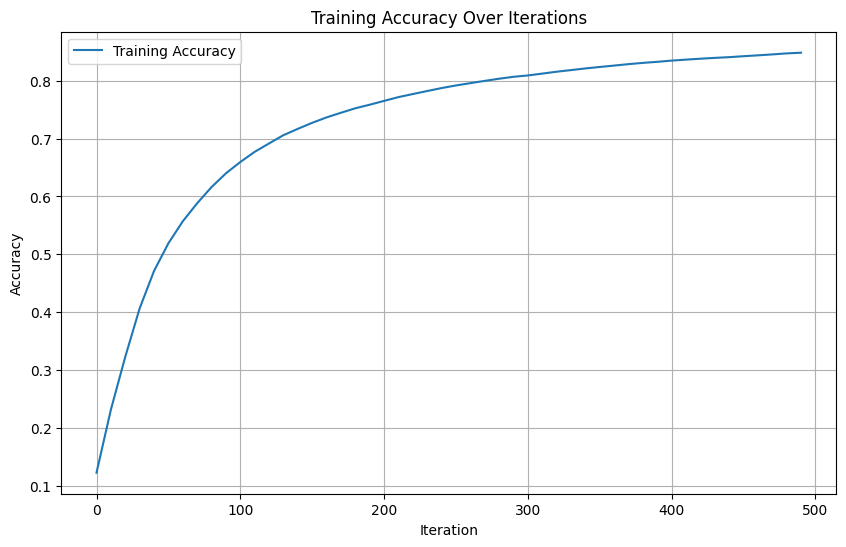

In [15]:
if 'X_train' in locals():
    # Start the training!
    # Parameters: (data, labels, learning_rate, iterations)
    W1, b1, W2, b2, iterations, accuracy = gradient_descent(X_train, Y_train, 0.10, 500)

    print("-------------------------")
    print("Plotting training accuracy...")

    # --- Graphical Analysis 1: Plot Accuracy vs. Iterations ---
    plt.figure(figsize=(10, 6))
    plt.plot(iterations, accuracy, label='Training Accuracy')
    plt.title('Training Accuracy Over Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

else:
    print("Error: Training data not found. Please run all previous cells.")

~85% accuracy on training set.

<h1> 7. VISUALIZE PREDICTIONS</h1>
<p>This cell defines functions to test our trained model on individual images and visualize the results.</p>

Defining prediction and visualization functions...
Running visualization for a few examples:
Prediction: 1
Label: 1


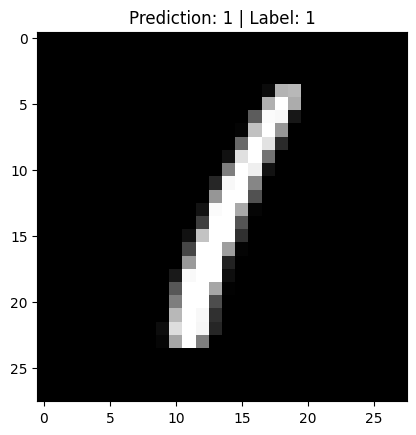

Prediction: 4
Label: 4


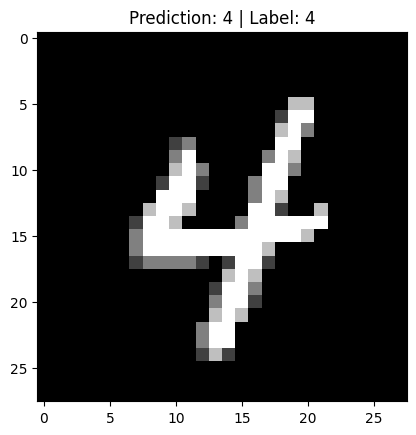

Prediction: 2
Label: 2


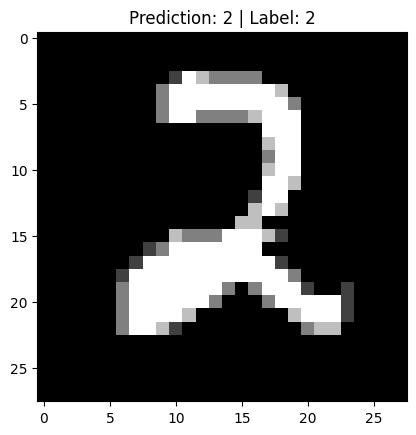

Prediction: 8
Label: 8


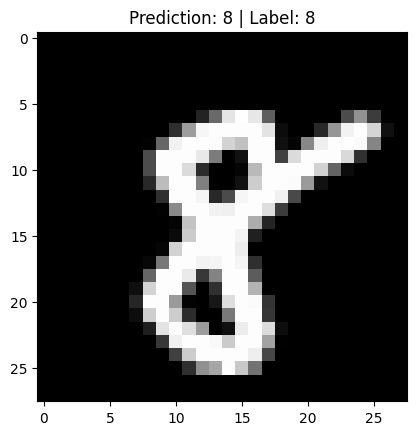

In [16]:
print("Defining prediction and visualization functions...")

def make_predictions(X, W1, b1, W2, b2):
    """
    Runs forward prop once to get a prediction for new data X.
    """
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    """
    Picks an image from the training set by its index,
    makes a prediction, and plots the image.
    """
    # Select the image (column) from the training set
    current_image = X_train[:, index, None] # Keep it as a 2D array (784x1)

    # Make a prediction
    prediction = make_predictions(current_image, W1, b1, W2, b2)

    # Get the true label
    label = Y_train[index]

    print(f"Prediction: {prediction[0]}")
    print(f"Label: {label}")

    # Reshape the image from 784x1 back to 28x28
    current_image = current_image.reshape((28, 28)) * 255 # Un-normalize (0-1 -> 0-255)

    # --- Graphical Analysis 2: Show the Image ---
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.title(f"Prediction: {prediction[0]} | Label: {label}")
    plt.show()

# --- Run a few tests ---
if 'W1' in locals():
    print("Running visualization for a few examples:")
    test_prediction(0, W1, b1, W2, b2)
    test_prediction(1, W1, b1, W2, b2)
    test_prediction(42, W1, b1, W2, b2)
    test_prediction(101, W1, b1, W2, b2)
else:
    print("Error: Model not trained. Please run the training cell (Cell 6).")

<h1> 8. VALIDATION AND DEEPER ANALYSIS</h1>
<p>Now we test the model's quality on the unseen validation set (X_dev, Y_dev)</p>

-------------------------
Running analysis on Validation Set (unseen data)...
Validation Accuracy: 84.50%
-------------------------
Plotting Confusion Matrix...


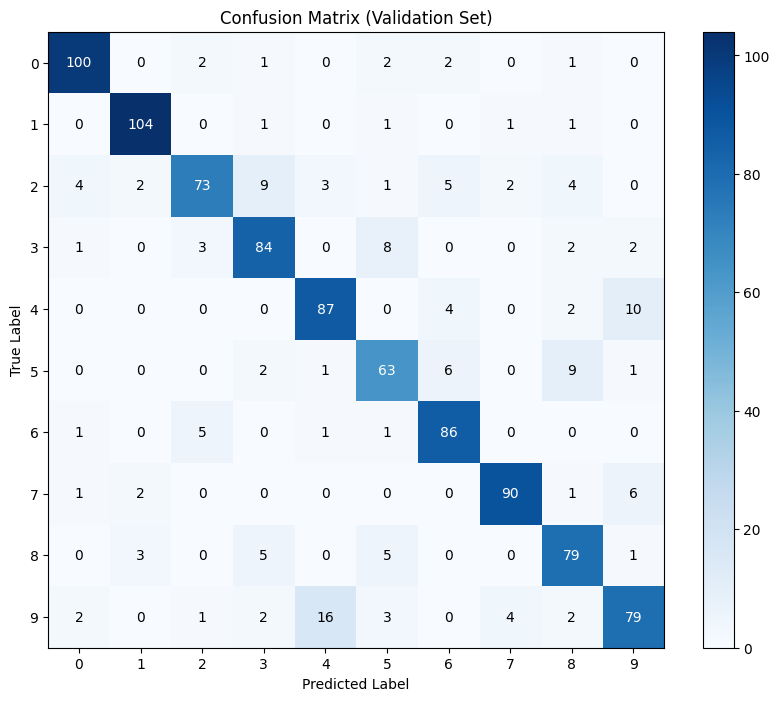

-------------------------
Displaying some incorrect predictions from the validation set...


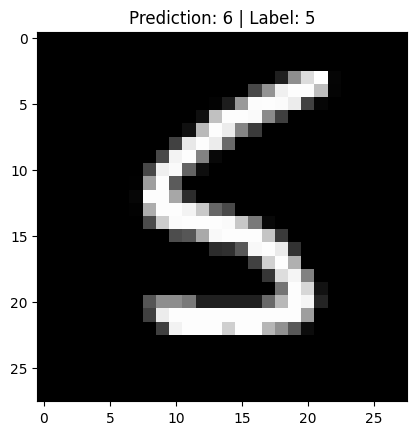

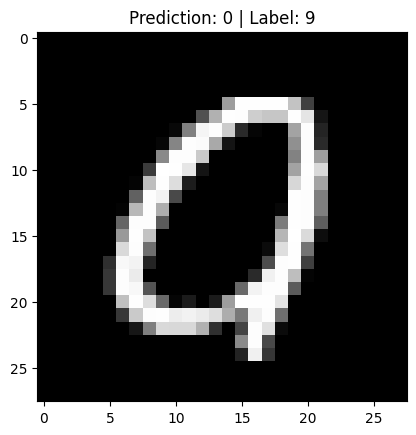

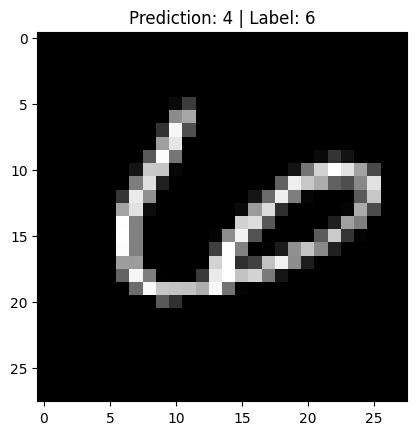

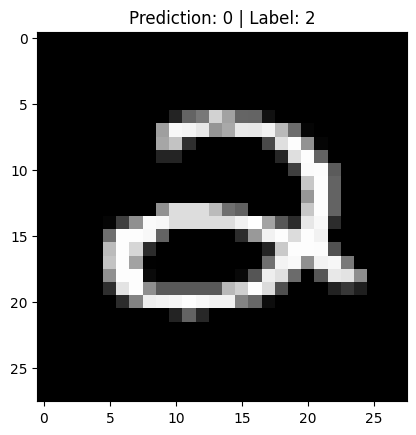

In [19]:
if 'W1' in locals():
    print("-------------------------")
    print("Running analysis on Validation Set (unseen data)...")

    # --- 1. Calculate Validation Accuracy ---
    dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
    dev_accuracy = get_accuracy(dev_predictions, Y_dev)
    print(f"Validation Accuracy: {dev_accuracy * 100:.2f}%")
    print("-------------------------")

    # --- 2. Graphical Analysis: Confusion Matrix ---
    print("Plotting Confusion Matrix...")

    # Create a 10x10 zero matrix
    confusion_matrix = np.zeros((10, 10), dtype=int)

    # Loop over all validation predictions
    for i in range(len(Y_dev)):
        true_label = Y_dev[i]
        predicted_label = dev_predictions[i]
        confusion_matrix[true_label, predicted_label] += 1

    # Plot the matrix
    fig, ax = plt.subplots(figsize=(10, 8))
    im = ax.imshow(confusion_matrix, cmap='Blues', interpolation='nearest')

    # Add labels and title
    ax.set_title('Confusion Matrix (Validation Set)')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    ax.set_xticks(np.arange(10))
    ax.set_yticks(np.arange(10))
    fig.colorbar(im, ax=ax)

    # Add text annotations
    # Set text color based on background darkness
    threshold = confusion_matrix.max() / 2.
    for i in range(10):
        for j in range(10):
            count = confusion_matrix[i, j]
            color = "white" if count > threshold else "black"
            ax.text(j, i, count, ha="center", va="center", color=color)

    plt.show()
    print("-------------------------")

    # --- 3. Graphical Analysis: Show Incorrect Predictions ---
    print("Displaying some incorrect predictions from the validation set...")

    # Find the indices of all incorrect predictions
    incorrect_indices = np.where(dev_predictions != Y_dev)[0]

    if len(incorrect_indices) > 0:
        # Helper function to plot validation images
        def test_dev_prediction(index, W1, b1, W2, b2):
            current_image = X_dev[:, index, None]
            prediction = make_predictions(current_image, W1, b1, W2, b2)
            label = Y_dev[index]

            # Reshape for plotting
            current_image = current_image.reshape((28, 28)) * 255

            plt.gray()
            plt.imshow(current_image, interpolation='nearest')
            plt.title(f"Prediction: {prediction[0]} | Label: {label}")
            plt.show()

        # Plot the first 4 incorrect predictions we find
        for i in range(min(4, len(incorrect_indices))):
            test_dev_prediction(incorrect_indices[i], W1, b1, W2, b2)

    else:
        print("Wow, no incorrect predictions found in the validation set!")

else:
    print("Error: Model not trained. Please run cell 6 before this one.")

Still ~85% accuracy, so our model generalized from the training data pretty well.

<h1> VIEW THE HTML FILE TO GET MORE INSIGHTS. </h1>